# Importing Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import sklearn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set()

In [6]:
from mlxtend.plotting import plot_decision_regions

In [7]:
import missingno as msno

In [8]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
%matplotlib inline

# Dataset

In [12]:
diabetes_df = pd.read_csv('diabetes.csv') 
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [13]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [18]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
diabetes_df_copy = diabetes_df.copy(deep = True)

In [20]:
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [21]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#  Data Visualization

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

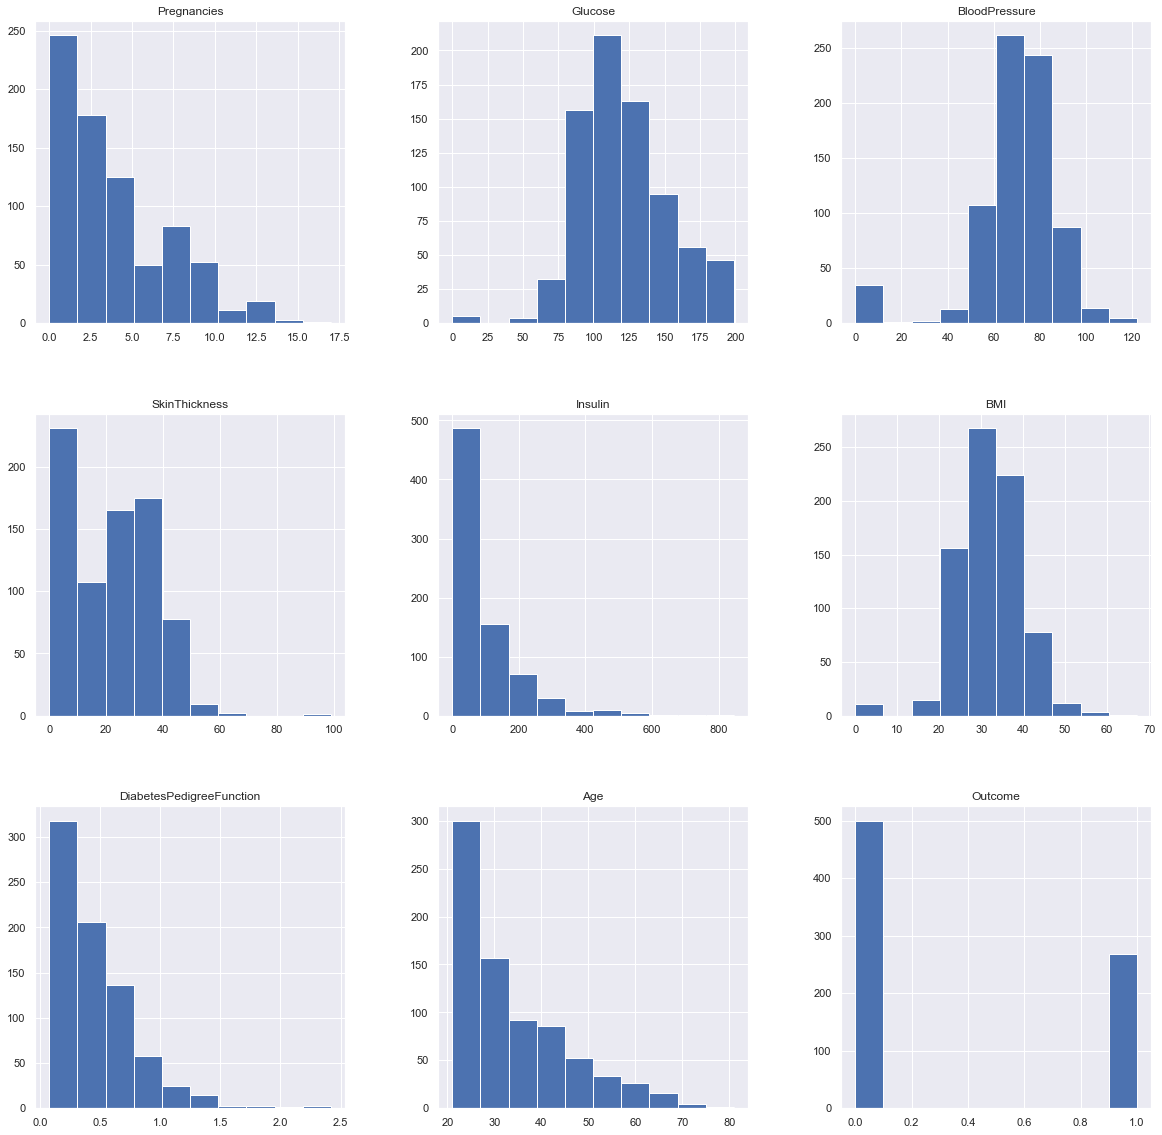

In [22]:
diabetes_df.hist(figsize = (20,20))

In [23]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

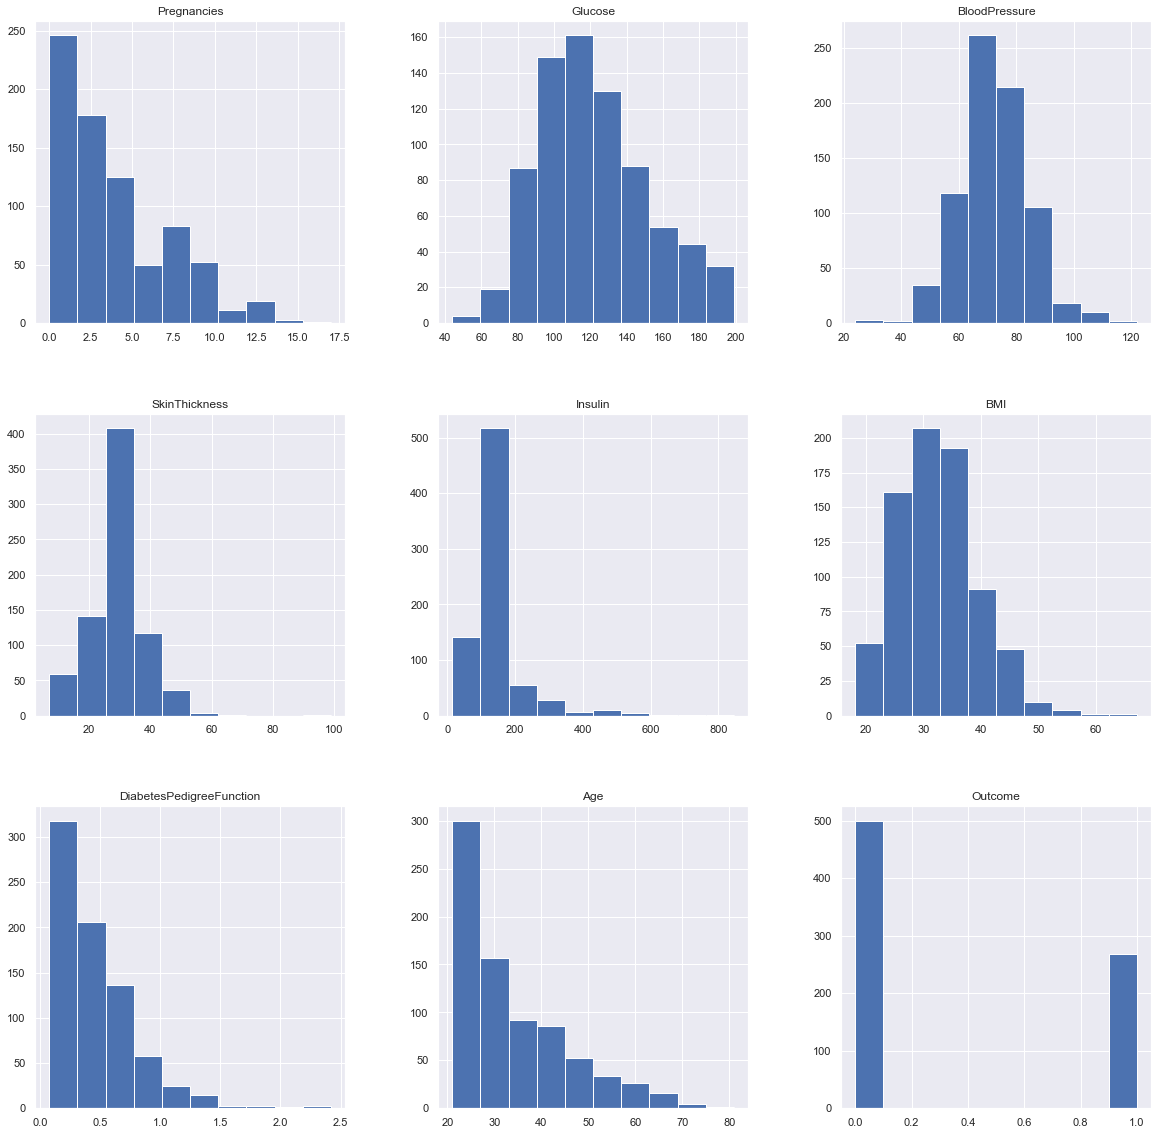

In [24]:
p = diabetes_df_copy.hist(figsize = (20,20))

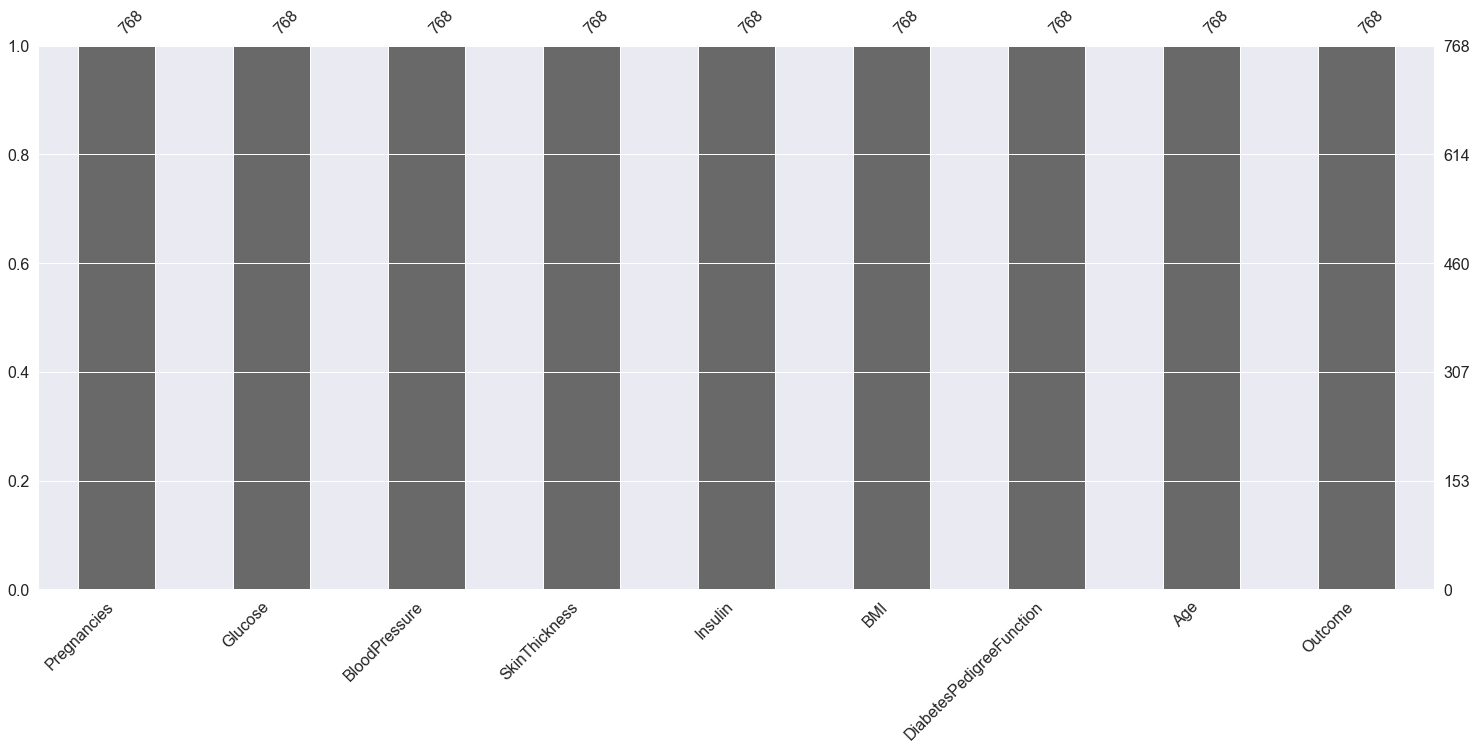

In [25]:
p = msno.bar(diabetes_df)

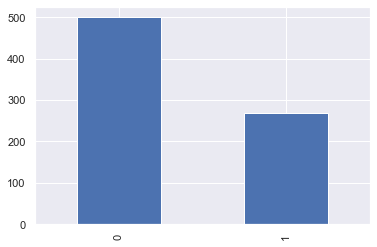

In [26]:
p=diabetes_df.Outcome.value_counts().plot(kind='bar')

In [27]:
print(diabetes_df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


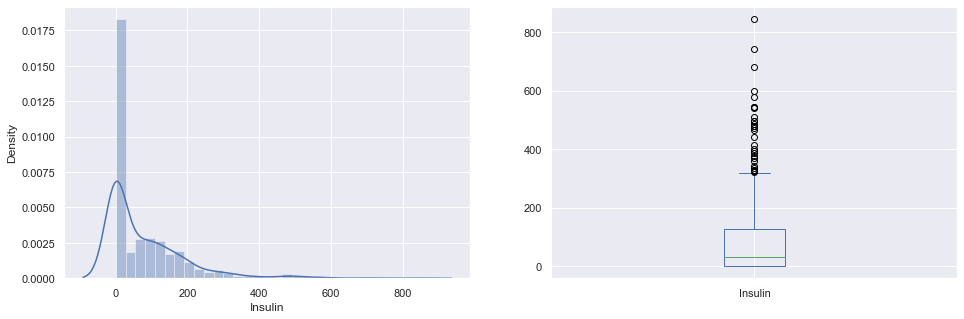

In [28]:
plt.subplot(121),sns.distplot(diabetes_df['Insulin']),plt.subplot(122)
diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

# Correlation between all the features

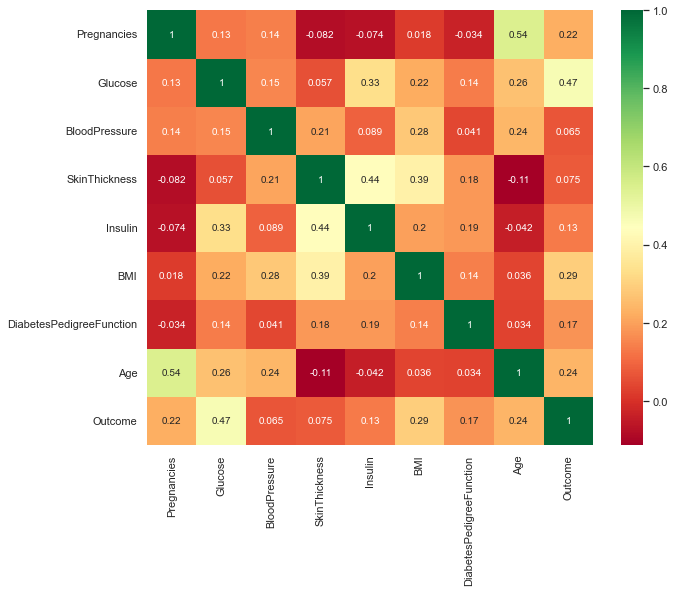

In [29]:
plt.figure(figsize=(10, 8))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

# Scaling the Data

In [30]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']) 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [32]:
scaler.fit(X)

StandardScaler()

In [33]:
standardized_data = scaler.transform(X)

In [34]:
print(standardized_data)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [35]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Building 

In [36]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier 

In [39]:
rfc = RandomForestClassifier(n_estimators=200)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
rfc_train = rfc.predict(X_train) 

In [42]:
from sklearn import metrics 

In [43]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [44]:
predictions = rfc.predict(X_test)

In [45]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7716535433070866


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(confusion_matrix(y_test, predictions))

[[137  25]
 [ 33  59]]


In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.70      0.64      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier(random_state=42)

In [51]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7047244094488189


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test,predictions))

[[129  33]
 [ 42  50]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       162
           1       0.60      0.54      0.57        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



# K-Nearest Neighbor

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=4)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [58]:
predictions = knn.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7086614173228346


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test,predictions))

[[141  21]
 [ 53  39]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       162
           1       0.65      0.42      0.51        92

    accuracy                           0.71       254
   macro avg       0.69      0.65      0.65       254
weighted avg       0.70      0.71      0.69       254



# Support Vector Machine (SVM)

In [61]:
from sklearn.svm import SVC

In [62]:
svc_model = SVC(kernel='linear') 

In [63]:
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
svc_pred = svc_model.predict(X_test)

In [65]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7834645669291339


In [66]:
print(confusion_matrix(y_test, svc_pred)) 
print(classification_report(y_test,svc_pred))

[[144  18]
 [ 37  55]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       162
           1       0.75      0.60      0.67        92

    accuracy                           0.78       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254



# Feature Importance

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [69]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [70]:
coefficients = svm.coef_

In [71]:
absolute_coefficients = abs(coefficients)

In [72]:
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

print("Feature Importance (Absolute Coefficients):")
for i, coef in enumerate(absolute_coefficients[0]):
    print(f"{feature_names[i]}: {coef}")

Feature Importance (Absolute Coefficients):
Pregnancies: 0.3093724897369948
Glucose: 0.9143669849808935
BloodPressure: 0.21525393998267095
SkinThickness: 0.0020829592677405473
Insulin: 0.08101778348954136
BMI: 0.4735935462317723
DiabetesPedigreeFunction: 0.3728352943088204
Age: 0.10211783229741223


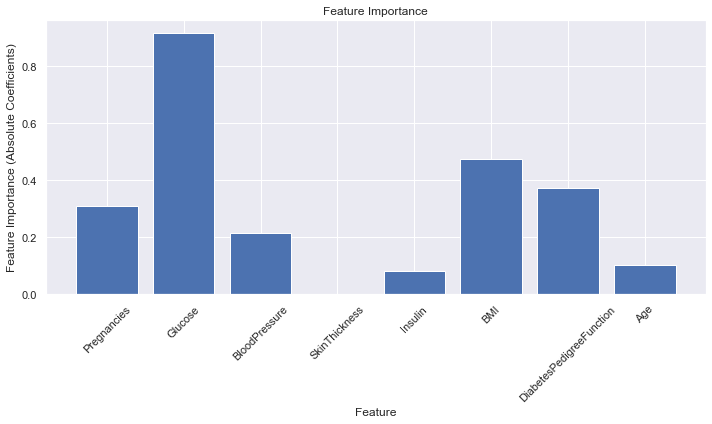

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(absolute_coefficients[0])), absolute_coefficients[0])
plt.xlabel('Feature')
plt.ylabel('Feature Importance (Absolute Coefficients)')
plt.title('Feature Importance')
plt.xticks(range(len(absolute_coefficients[0])), feature_names, rotation=45)  # Use feature names instead of "Feature i"
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
# Retrieve coefficients from the trained SVM model
coefficients = svm.coef_

# Take absolute values of coefficients
absolute_coefficients = np.abs(coefficients)

# Get the indices of the two features with the highest absolute coefficients
top_two_indices = np.argsort(absolute_coefficients)[0][-2:][::-1]

# Assuming feature_names contains the names of the features
# Print the names of the top two features
print("Top two features:")
for idx in top_two_indices:
    print(feature_names[idx])

Top two features:
Glucose
BMI


# SVM Model Deployment

In [75]:
input_data = (0,137,40,35,168,43.1,2.288,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-1.14413159  0.54660862 -1.46449156  0.92020564  0.81355905  1.40807476
   5.52725446  0.03112882]]
[1]
The person is diabetic


In [76]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.07722591 -0.28280691  1.21873646 -1.26896382 -0.70560995  0.70238987
  -0.8180654  -0.23116975]]
[0]
The person is not diabetic
